# LendingClub case_study

### Problem Statement
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


 

**If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.**

 

**In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.** 

 

In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the csv into a dataframe 'df' and viewing the top 5 rows
df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#looking at the shape of the data
df.shape

(39717, 111)

In [4]:
#understanding the data by describing the columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning
### It is observed that many columns have all NaN values, Hence removing columns with all NaN values

In [5]:
#Finding out the columns that have all NaN values
df.columns[df.isna().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [6]:
#dropping the columns that are having all NaN values
df.dropna(axis=1,how="all",inplace=True)

In [7]:
#checking the shape of the data after dropping the columns with all NaNs
df.shape

(39717, 57)

In [8]:
#finding how many columns still consists of NaN values
df.columns[df.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [9]:
#Checking the distribution of NaN values in different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### There are some columns with more than 50% of NaN values, These columns cannot contribute to analysis, Hence dropping those columns

In [10]:
#dropping the columns that have more than 50% of NaN values
df.dropna(axis=1,thresh=df.shape[0]/2,inplace=True)

In [11]:
#looking at the shape of the data after removing all NaN columns
df.shape

(39717, 54)

In [12]:
#understanding the data after removing NaN to find other irregularities
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### It is observed that some columns have majority values as 0, these columns do not contribute to analysis, Hence removing the columns that are mostly having 0's as entries

In [13]:
#checking the columns that have zeros till 80th percentile 
check = (df.quantile(0.80) > 0) 
check = check[check == False]

In [14]:
#dropping the columns that have mean and median as 0 (zero)
df.drop(labels=check.index.tolist(),inplace=True,axis=1)

In [15]:
#checking the shape of the data after removing the columns with mostly 0's
df.shape

(39717, 41)

In [16]:
#looking at the remaining columns to see which columns have duplicate values and are not useful for analysis
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type'],
      dtype='object')

### Some columns that can be dropped since they do not contribute to the analysis or redundant
- id (unique id to every loan)
- member_id (unique id to every member)
- funded_amnt (similar value of loan amount)
- funded_amnt_inv (related to investors value, not needed for analysis)
- url (url of the LC)
- emp_title (emp_title is not needed, we have annual income and emp_length to segment the data)
- desc (Description given by borrower, not properly segmented)
- title (Title of the loan given by borrower, the properly segmented data found in purpose column)
- zip_code (zip_code is not needed as we already have state wise data)

### Many post loan variables are dropped which are not useful for analysis because these variables arise after the loans are disbursed


- pymnt_plan 
- initial_list_status 
- policy_code 
- application_type 
- total_pymnt_inv 
- total_rec_prncp 
- total_rec_int 
- last_pymnt_amnt 
- last_credit_pull_d 
- earliest_cr_line
- inq_last_6mths
- open_acc
- revol_bal
- revol_util
- total_acc
- total_pymnt
- last_pymnt_d

In [18]:
#creating a list that has redundant columns that can be removed
redundant_column_list = ['id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','pymnt_plan', 'url', 'desc','title','zip_code','policy_code', 'application_type','initial_list_status','total_pymnt_inv',
        'total_rec_prncp', 'total_rec_int','last_pymnt_amnt','last_credit_pull_d',  'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal','revol_util', 'total_acc', 'total_pymnt', 'last_pymnt_d']

In [19]:
#dropping the redundant_column_list from the data
df.drop(labels=redundant_column_list,axis=1,inplace=True)

In [20]:
df.shape

(39717, 15)

### For our analysis the loan status of "Fully Paid" and "Charged Off" are needed, Hence removing the "Current" entries from the column

In [21]:
#removing the "Current" entries in loan data
df = df[~(df.loan_status == "Current")]

In [22]:
#looking at the shape of the data after removing the "Current" in loan staus from data
df.shape

(38577, 15)

## Data Handling
#### 1.Converting the emp_length column from object to an integer

In [23]:
#Handling the emp_length column from a categoricalvariable to a numerical variable
df['emp_length'].fillna(value=df['emp_length'].mode()[0],inplace=True)
df['emp_length']=df['emp_length'].apply(lambda x : str(x).split(" ")[0])

In [24]:
#function clear() is used to format the variables inside the 'emp_length' column
def clear(x):
    if x[0] == "<":
        return 0
    else:
        return x[0:2]

In [25]:
#changing the dtype of the variables from string to int64
df['emp_length']=df['emp_length'].apply(clear).astype("int64") 

#### 2.Converting the 'sub_grade' column from string to int

In [26]:
#formatting the data and converting it from string to int64
df['sub_grade']=df['sub_grade'].apply(lambda x:x[-1]).astype("int64")

#### 3.Extracting the year and month columns from the 'issue_d' column

In [27]:
#converting the 'issue_d' into pd.datetime format and slplitting into month anad year
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

#### 4.Modifying the 'int_rate column

In [28]:
#converting int_rate column from string to numeric after removing % 
df['int_rate'] = pd.to_numeric(df['int_rate'].str.strip('%'))

#### 5.Creating a new variable that takes boolean value of loan status i.e, {"Fully Paid":0,"Charged Off":1}

In [29]:
#creating a new column "loan_status_quant" that has 0 for fully paid and 1 for charged off that helps in our analysis
df["loan_status_quant"] = df["loan_status"].map({"Fully Paid":0,"Charged Off":1})

In [30]:
#finding out the percentage of charged off loans from the total loans given
print("Total percentage of Charged-Off loans")
df["loan_status_quant"].sum()/len(df["loan_status_quant"])*100

Total percentage of Charged-Off loans


14.586411592399617

   
   # Univariate analysis
 #### In univariate analysis we analyse a single variable to understand its distribution

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


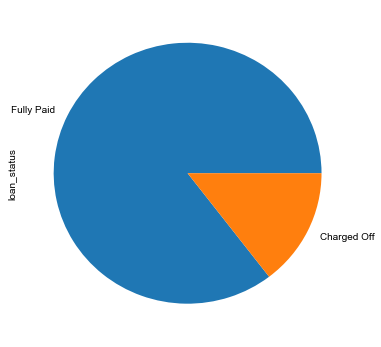

In [31]:
#Plotting a pie chart to see the ratio of charged off and fully paid from the total number of loans given
plt.figure(figsize=(6,6))
df['loan_status'].value_counts().plot(kind='pie')
sns.set_style('whitegrid')
#printing the values in the loan status variable
print(df['loan_status'].value_counts())

### Loan_amnt

In [32]:
#analysing the statistics of the 'loan amount' variable
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

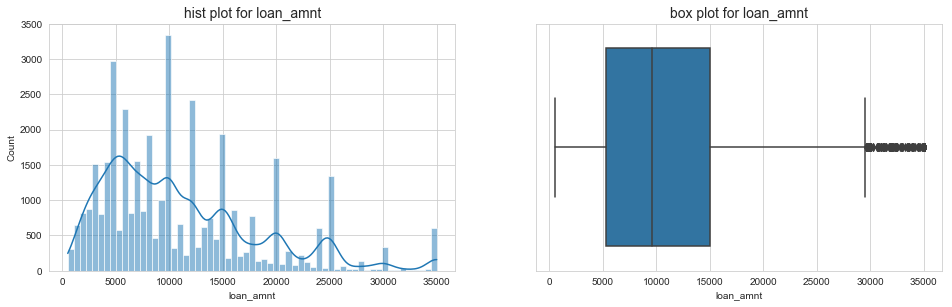

In [33]:
#drawing histplot and box-plot for loan_amnt simultaneously to undertand its distribution and outlier detection
plt.figure(figsize=(16,10))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.histplot(df.loan_amnt,kde=True)
plt.title("hist plot for loan_amnt",fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(df.loan_amnt)
plt.title("box plot for loan_amnt",fontsize=14)
plt.show()

### Insights
- #### Most of the loan amounts are distributed between 5000 and 15000
- #### The median of the loan amount is close to 10000
- #### At every multiple of 5000, there is a peak in loan amount, which says that loans are often sanctioned in multiples of 5000

### int_rate

In [34]:
#statistical analysis of int_rate variable
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

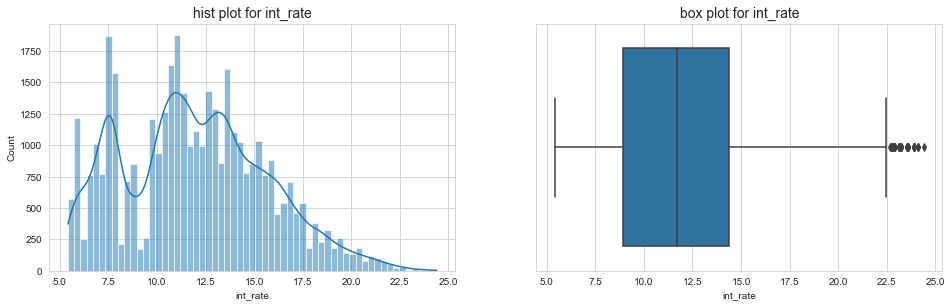

In [35]:
#drawing histplot and box-plot for int_rate simultaneously to undertand its distribution and outlier detection
plt.figure(figsize=(16,10))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.histplot(df.int_rate,kde=True)
plt.title("hist plot for int_rate",fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(df.int_rate)
plt.title("box plot for int_rate",fontsize=14)
plt.show()

### Insights
- #### The mean interest rate of the loans is 11.9% and the median is 11.7%
- #### There are very high interest rates upto 24% but the number of loans at such interest rates are quite low

## term 

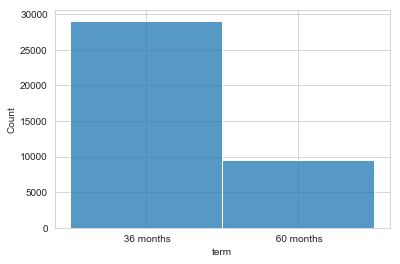

In [36]:
#plotting a histogram for the variable term to see how the data is distributed
sns.histplot(df['term'])

### Insights
- #### The majority of the term is 36 months 
- #### This variable does not convey any insights

### installment

In [37]:
#understanding the statistical distribution of the data by using describe()
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

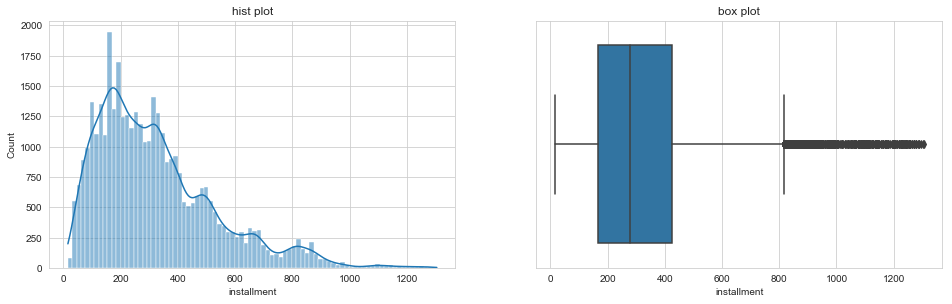

In [38]:
#drawing plots for instalment
plt.figure(figsize=(16,10))
# subplot 1 - Histogram
plt.subplot(2, 2, 1)
ax = sns.histplot(df.installment,kde=True)
plt.title("hist plot")
# subplot 2 - Boxplot
plt.subplot(2, 2, 2)
ax = sns.boxplot(df.installment)
plt.title("box plot")
plt.show()

### Insights
- #### Majority of the installment lie between 200-400, median installment is 277 and mean is 322


### grade

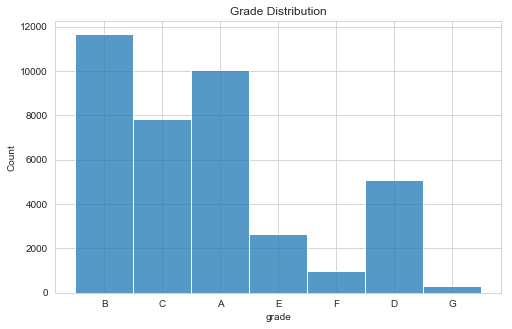

In [39]:
#drawing plot for Grade 
plt.figure(figsize=(8,5))
ax = sns.histplot(df['grade'])
plt.title("Grade Distribution")
plt.show()

#### Insights
- #### The most number of loans are graded in 'B','C','A'


### Annual Income

In [40]:
#understanding the statistics of 'annual_inc' by using describe()
df['annual_inc'].describe().round(2)

count      38577.00
mean       68777.97
std        64218.68
min         4000.00
25%        40000.00
50%        58868.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: float64

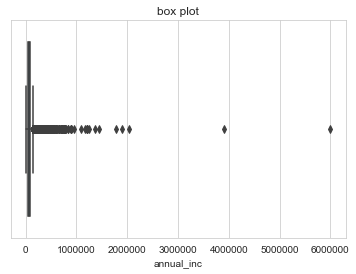

In [41]:
#plotting a box plot to see the outliers in the data
ax = sns.boxplot(df["annual_inc"])
plt.title("box plot")
plt.show()

#### Clearly there are huge number of outliers in the data of annual_income

In [42]:
#checking the percentiles from 80,90,95,99,100
df['annual_inc'].quantile(q=([0.8,0.9,0.95,0.99,1]))

0.80      90000.0
0.90     115000.0
0.95     140004.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [43]:
#considering the annual incomes < 99 percentile to avoid the outliners
df=df[df['annual_inc']<df['annual_inc'].quantile(0.99)]

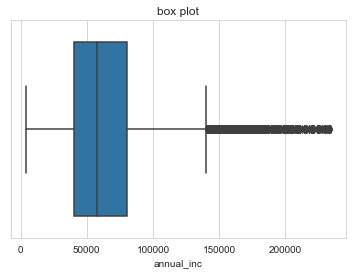

In [44]:
#plotting a boxplot again to see how the annual_income fares now
ax = sns.boxplot(df["annual_inc"])
plt.title("box plot")
plt.show()


### Insights 
- #### Mean annual_income is 65000 and median annual_income is 58000
- #### Annual income is an important variable and further analysis is continued in bivariate seection

###  Addr_state 

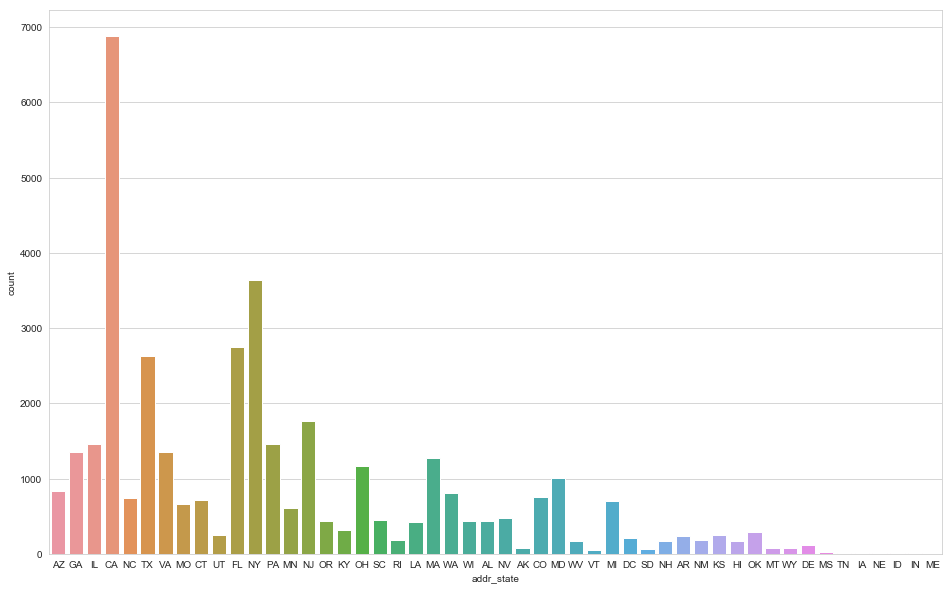

In [45]:
#plotting the plot to see the loans sanctioned across the states 
plt.figure(figsize=(16,10))
ax = sns.countplot(df['addr_state'])

### Insights
- #### Very few states such as CA,NY,FL,TX have high number of loans and all others are fairly lower

### Purpose

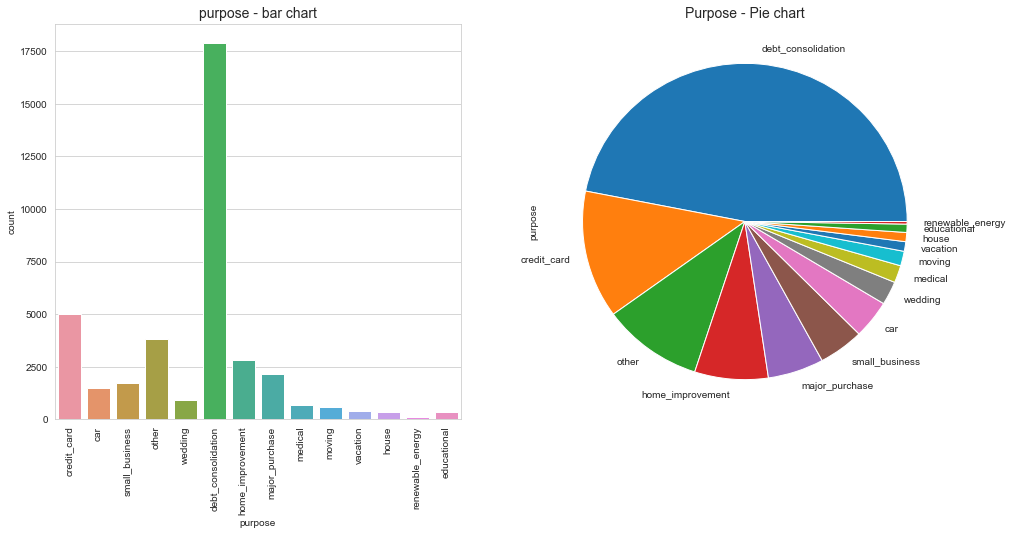

In [46]:
#plotting the bar plot and pie chart for purpose
plt.figure(figsize=(16,16))
# subplot 1 - Grade distribution
plt.subplot(2, 2, 1)
ax = sns.countplot(df['purpose'])
plt.xticks(rotation = 90)
plt.title("purpose - bar chart",fontsize=14)

# subplot 2 - Sub Grade Distribution
plt.subplot(2, 2, 2)
df['purpose'].value_counts().plot.pie()
plt.title("Purpose - Pie chart",fontsize = 14)
plt.show()

### Insights
- #### Debt Consolidation is the purpose for almost 50% of the loans followed by credit card and others

- #### All the other purposes have very few loans disbursed

### Year

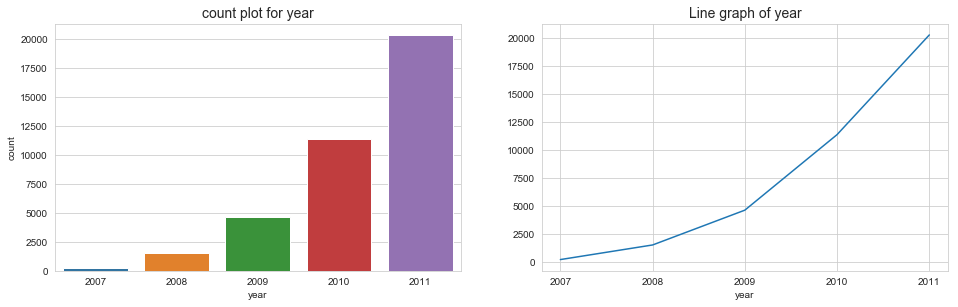

In [47]:
#plotting a count-plot and a line graph for the variable year
plt.figure(figsize=(16,10))
# subplot 1 - Grade distribution
plt.subplot(2, 2, 1)
ax = sns.countplot(df['year'])
plt.title("count plot for year",fontsize=14)

# subplot 2 - Sub Grade Distribution
plt.subplot(2, 2, 2)
df['year'].value_counts().plot()
ticks = np.arange(2007,2012,1)
plt.xticks(ticks)
plt.xlabel('year')
plt.title("Line graph of year",fontsize = 14)
plt.show()

### Insights
- #### The number of loans almost doubled every year from 2007 to 2011

# Bivariate & Multivariate analysis
### In this segment we analyse the charged off percentage vs various variables 

#### we compare every important variable with percentage of charged-off loans because only the percentage value can give us the right information rather than looking at the absolute numbers

In [48]:
#creating a function that can be used as estimator in the bar-plots
def per_value(x):
    return (np.mean(x))*100

#the function per_value returns the percentage of charged off loans by finding the mean of 'loan_status_quant' variable

### Addr_state vs charged-off percentage

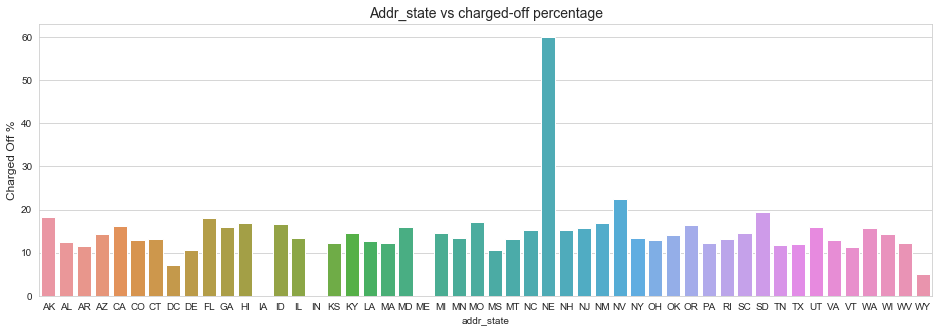

In [49]:
#plotting a bar plot for the charged of percentage across addr_state to see the default rate w.r.t percentages
plt.figure(figsize=(16,5))
sns.barplot(data=df,x='addr_state',y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['addr_state'].unique().tolist()))
plt.title("Addr_state vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

### Insights
- #### State of NE has abnormal amount, i.e; 60% of default rate, but the number of loans given in NE are very very low and hence ignored.
- #### The states of CA,NY,FL,TX where we found significant amount of loans given have default rates less than 16% like many other states

### Term vs charged-off percentage

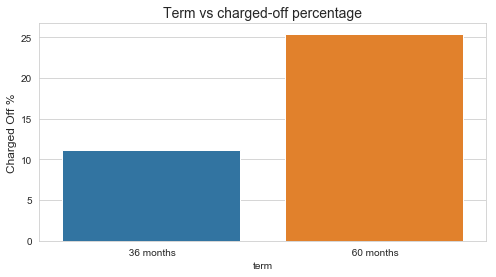

In [50]:
#plotting a bar plot for term against the default perentage
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="term",y='loan_status_quant',estimator=per_value,ci=None)
plt.title("Term vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

### Insights
- #### It is found that loans with term 36 months have 11% default rate while those with 60months have a whopping 25% default rate.
- #### It can be understood that loans with 60 months term are more likely to default than that of 36 months term

### Grade vs charged-off percentage

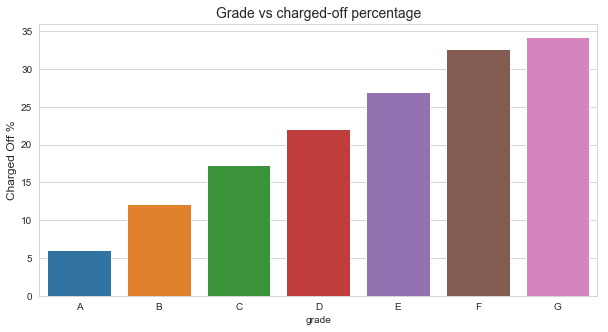

In [51]:
#plotting a bar plot for grade vs charged-off percentage
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="grade",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['grade'].unique().tolist()))
plt.title("Grade vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

### Insights
- #### The loans are actually graded pretty well, the default rate increases linearly from A to G grades, with A having the lowest default rate
- #### Exposure to grades E,F,G has high defualt rate though they are small in number and can be avoided while approving loans 

### Home ownership vs charged-off percentage

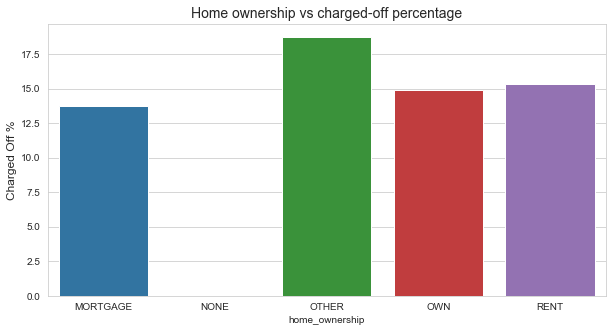

In [52]:
#plotting a bar plot for home_ownership vs charged-off percentage
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df,x="home_ownership",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['home_ownership'].unique().tolist()))
plt.title("Home ownership vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

### Insights
- #### Among the categories such as Mortgage, Own, Rent, there is not much variation in terms of default percentage
- #### The category of other has a higher percentage of default among all others

### Purpose vs charged-off percentage

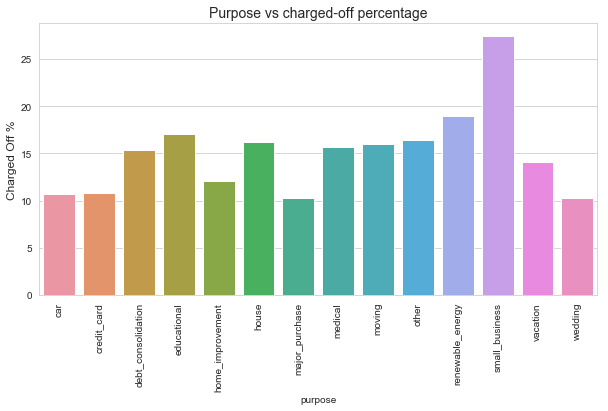

In [53]:
#plotting bar plot for Purpose vs charged-off percentage
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="purpose",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['purpose'].unique().tolist()))
plt.xticks(rotation=90)
plt.title("Purpose vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

### Insights
- #### In Univariate analysis of purpose variable we found out the debt_consolidation had the largest number of loans followed by credit card.
- #### In bi-variate analysis we found the rate of defualt across the purposes is mostly 10-16%, except small business that has more than 25% default rate. Since small business has very few loans, this can be ignored.

### Year vs charged-off percentage

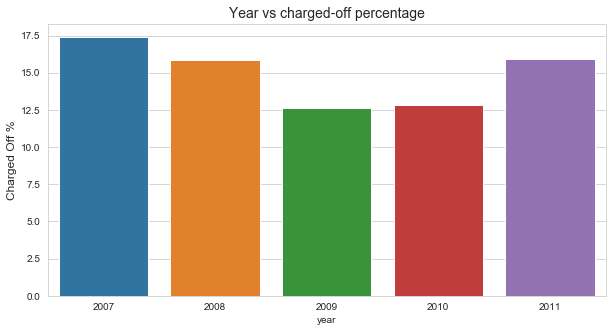

In [54]:
#plotting bar plot for year vs charged-off percentage
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="year",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['year'].unique().tolist()))
plt.title("Year vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

### Insights
- #### Though the number of loans approved every year have doubled, the charged-off percentage is stabilized between 12.5-16%


### Employee Length vs charged-off percentage

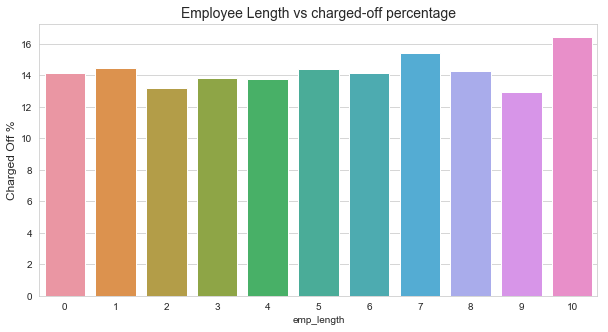

In [55]:
#plotting bar plot for Employee Length vs charged-off percentage
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="emp_length",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['emp_length'].unique().tolist()))
plt.title("Employee Length vs charged-off percentage",fontsize=14)
plt.ylabel("Charged Off %",fontsize=12)
plt.show()

# From the graph below we can observe that except the applicants with 10 years service, all others have slighty similar rate of default

## Converting numeric variables into categorical variables by binning
### Creating new columns after binning

In [56]:
# Derived variables

# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], [0, 10000, 20000, 30000, 35000], labels=['0-10000', '10000-20000', '20000-30000', '35000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df['annual_inc_cat'] = pd.cut(df['annual_inc'], [0, 25000, 50000, 80000, 100000,230000], labels=['very low', 'low', 'medium', 'high', 'very high'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df['int_rate_cat'] = pd.cut(df['int_rate'], [5, 10, 15, 20, 25], labels=['5-10', '10-15', '15-20', '20 +'])

# categorise dti into buckets for bivariate analysis.
df['dti_cat'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [57]:
# looking at the top 2 rows of the data after creating new categorical variables.
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,addr_state,dti,year,month,loan_status_quant,loan_amnt_cat,annual_inc_cat,int_rate_cat,dti_cat
0,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,...,credit_card,AZ,27.65,2011,12,0,0-10000,very low,10-15,NaN
1,2500,60 months,15.27,59.83,C,4,0,RENT,30000.0,Source Verified,...,car,GA,1.00,2011,12,1,0-10000,low,15-20,0-5


### Loan amount range vs charged-off percentage

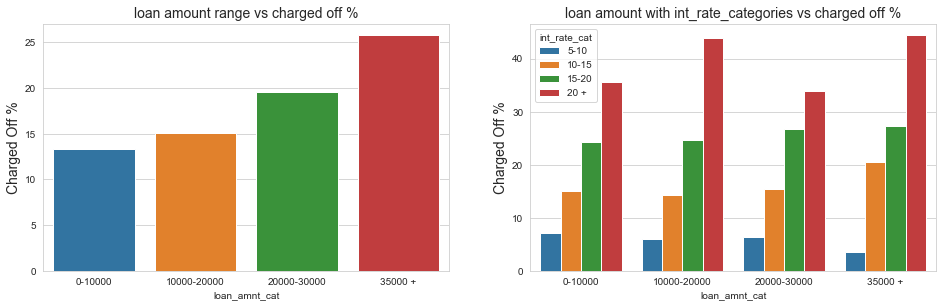

In [58]:
#plotting bi-variate and multivariate analysis of vaiables
plt.figure(figsize=(16,10))
# subplot 1 - loan amount range vs charged off %
plt.subplot(2, 2, 1)
ax = sns.barplot(data=df,x="loan_amnt_cat",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['loan_amnt_cat'].unique().tolist()))
plt.title("loan amount range vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
# subplot 2 - loan amount under int_rate_categories vs charged off %
plt.subplot(2, 2, 2)
ax = sns.barplot(data=df,x="loan_amnt_cat",y='loan_status_quant',hue='int_rate_cat',estimator=per_value,ci=None,order=sorted(df['loan_amnt_cat'].unique().tolist()))
plt.title("loan amount with int_rate_categories vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
plt.show()

### Insights
- #### Loan amounts upto 10000 have the least charged-off % and the charged-off % increases as we move towards 35000 and above
- #### In loan amounts with int_rate_categories we can see that higher interest rate loans are more prone to defaults and interestingly in higher loan amounts and lower interest rates, the default rate is less.

### Annual income vs charged-off percentage

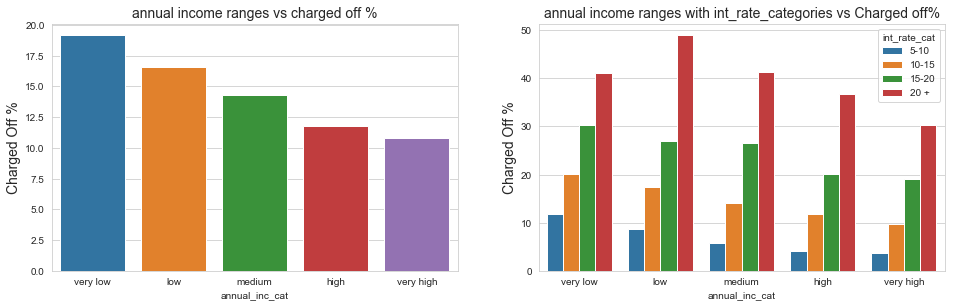

In [59]:
#plotting bi-variate and multivariate analysis of vaiables
plt.figure(figsize=(16,10))
# subplot 1 - annual income ranges vs charged off %
plt.subplot(2, 2, 1)
ax = sns.barplot(data=df,x="annual_inc_cat",y='loan_status_quant',estimator=per_value,ci=None,order=['very low','low','medium','high','very high'])
plt.title("annual income ranges vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
# subplot 2 - annual income ranges with int_rate_categories vs Charged off%
plt.subplot(2, 2, 2)
ax = sns.barplot(data=df,x="annual_inc_cat",y='loan_status_quant',hue='int_rate_cat',estimator=per_value,ci=None,order=['very low','low','medium','high','very high'])
plt.title("annual income ranges with int_rate_categories vs Charged off%",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
plt.show()

### Insights
- #### Very low annual income segment are highly likely to default than any other category
- #### As we can see the trend that applicants with higher annual income under any interest rates have lower defualt rates

### Interest rates vs charged-off percentage

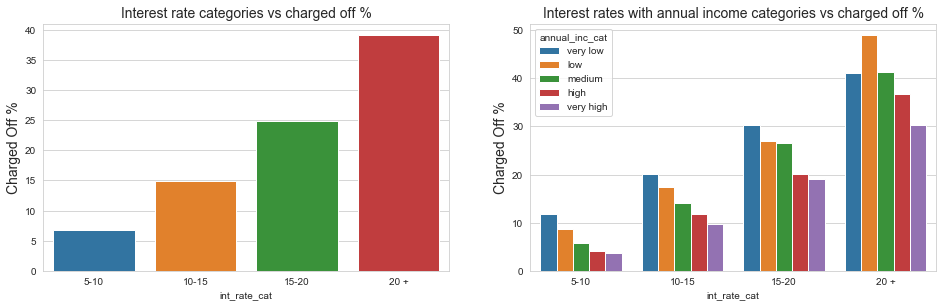

In [60]:
plt.figure(figsize=(16,10))
# subplot 1 - Interest rate categories vs charged off %
plt.subplot(2, 2, 1)
sns.barplot(data=df,x="int_rate_cat",y='loan_status_quant',estimator=per_value,ci=None,order=['5-10', '10-15', '15-20', '20 +'])
plt.title("Interest rate categories vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
# subplot 2 - Interest rates with annual income categories vs charged off %
plt.subplot(2, 2, 2)
sns.barplot(data=df,x="int_rate_cat",y='loan_status_quant',hue='annual_inc_cat',estimator=per_value,ci=None,order=['5-10', '10-15', '15-20', '20 +'])
plt.title("Interest rates with annual income categories vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
plt.show()

### Insights
- #### The trend shows that default rates are directly correlated to interest rates.
- #### Among the various interest rate categories also, the very low and low income groups are tend to default more than others

### DTI vs charged-off percentage

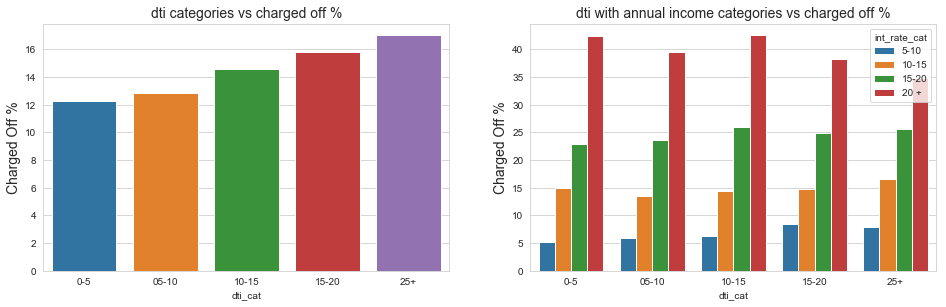

In [61]:
plt.figure(figsize=(16,10))
# subplot 1 - Interest rate categories vs charged off %
plt.subplot(2, 2, 1)
sns.barplot(data=df,x="dti_cat",y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['dti_cat'].value_counts().index.tolist()))
plt.title("dti categories vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
# subplot 2 - Interest rates with annual income categories vs charged off %
plt.subplot(2, 2, 2)
sns.barplot(data=df,x="dti_cat",y='loan_status_quant',estimator=per_value,ci=None,hue='int_rate_cat',order=sorted(df['dti_cat'].value_counts().index.tolist()))
plt.title("dti with annual income categories vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
plt.show()


### Insights
- #### with increase in DTI it is observed that the default rates are also increasing.
- #### Within DTI ranges it is also observed that int_rate plays a major role in terms of charged off % 
- #### Higher int_rate categories have a higher propensity to default

### Creating a new variable 'loan to annual income' which helps in our analysis
#### This helps us to understand the amount of loan applied in percentage terms of applicants' annual income. This can act as a better along with DTI to identify risky loans

In [62]:
#creating a new variable "Loan to annual Income" that has ratio of loan_amount applied to their respective annual income.
df['l_t_ai'] = df['loan_amnt']/df['annual_inc']

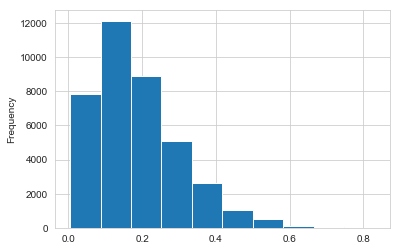

In [63]:
#plotting a histogram to see the distribution of the data in loan to annual income variable
df['l_t_ai'].plot.hist()
plt.show()

- #### Majority of the loans are spread between 0.1 and 0.2 l_t_ai which is healthy because most of the loans are within 20% of applicants' annual income

### Conversion of loan to annual income variable from numeric to categorical varaible

In [64]:
#using pandas pd.cut, creation of a categorical variable from an existing numerical variable
df['l_t_ai_cat'] = pd.cut(df['l_t_ai'], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], labels=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4+'])

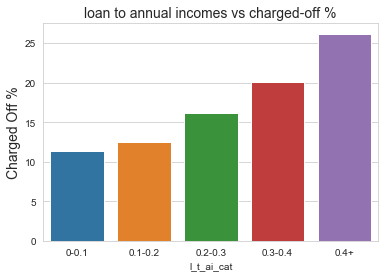

In [65]:
#plotting a bar plot for loan to annual income categorical variable for charged off %
sns.barplot(data=df,x='l_t_ai_cat',y='loan_status_quant',estimator=per_value,ci=None,order=sorted(df['l_t_ai_cat'].value_counts().index.tolist()))
plt.title("loan to annual incomes vs charged-off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
plt.show()

### Insights
#### As long as the l_t_ai is within 0.2 or 20%, the propensity to default is very less 

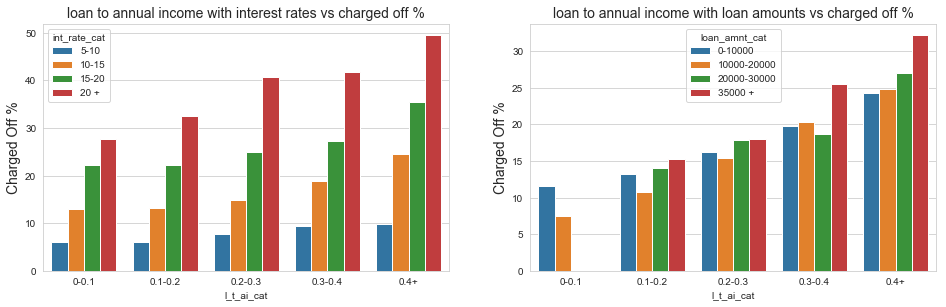

In [66]:
#plotting loan to annual income with interest rates and loan amounts vs charged off %
plt.figure(figsize=(16,10))
# subplot 1 - loan to annual income with interest rates vs charged off %
plt.subplot(2, 2, 1)
sns.barplot(data=df,x='l_t_ai_cat',y='loan_status_quant',estimator=per_value,ci=None,hue='int_rate_cat',order=sorted(df['l_t_ai_cat'].value_counts().index.tolist()))
plt.title("loan to annual income with interest rates vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
#subplot 2 - loan to annual income with loan amounts vs charged off %
plt.subplot(2, 2, 2)
sns.barplot(data=df,x='l_t_ai_cat',y='loan_status_quant',estimator=per_value,ci=None,hue='loan_amnt_cat',order=sorted(df['l_t_ai_cat'].value_counts().index.tolist()))
plt.title("loan to annual income with loan amounts vs charged off %",fontsize=14)
plt.ylabel("Charged Off %",fontsize=14)
plt.show()

### Insights
- #### Higher interest rates even in lower l_t_ai are more likely to default than lower int rates in higher l_t_ai
- #### In lower l_t_ai, irrespective of the loan amount, the default rates are lesser than compared to higher l_t_ai
- #### A loan of sub 10000 in 0.4 l_t_ai has 25% default rate whereas a loan of 35000+ in 0.1-0.2 l_t_ai has 15% default rate

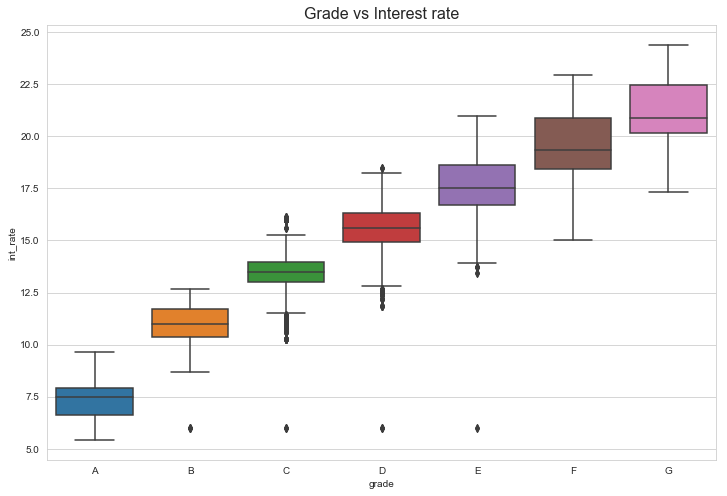

In [67]:
#plotting a box plot for Grade vs Interest rate to see how the interest rates vary for various grades
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='grade',y='int_rate',order=['A','B','C','D','E','F','G'])
plt.title("Grade vs Interest rate",fontsize=16)
plt.show()

### Insights
- #### The rate of interest is highly dependant on the Grade of the loan. 
- #### Better graded loans have lower interest rates and interest rate rises as the grade decreases

## Observations

#### The following are the driving factors that determines the propensity to default

- #### loan amount
- #### Int rate
- #### Annual income
- #### dti
- #### l_t_ai

#### Since the majority of loans are from the top 4 states in the country, let us analyse the various variable within the top states alone to understand the major chunck of the loan book and the driving factors to default



In [68]:
#Filtering only top 4 states in terms of loans disbursed into a new dataframe 'top_states'
top_states =  df[df['addr_state'].isin(['CA','NY','FL','TX'])]

## Multivariate analysis with driving factors

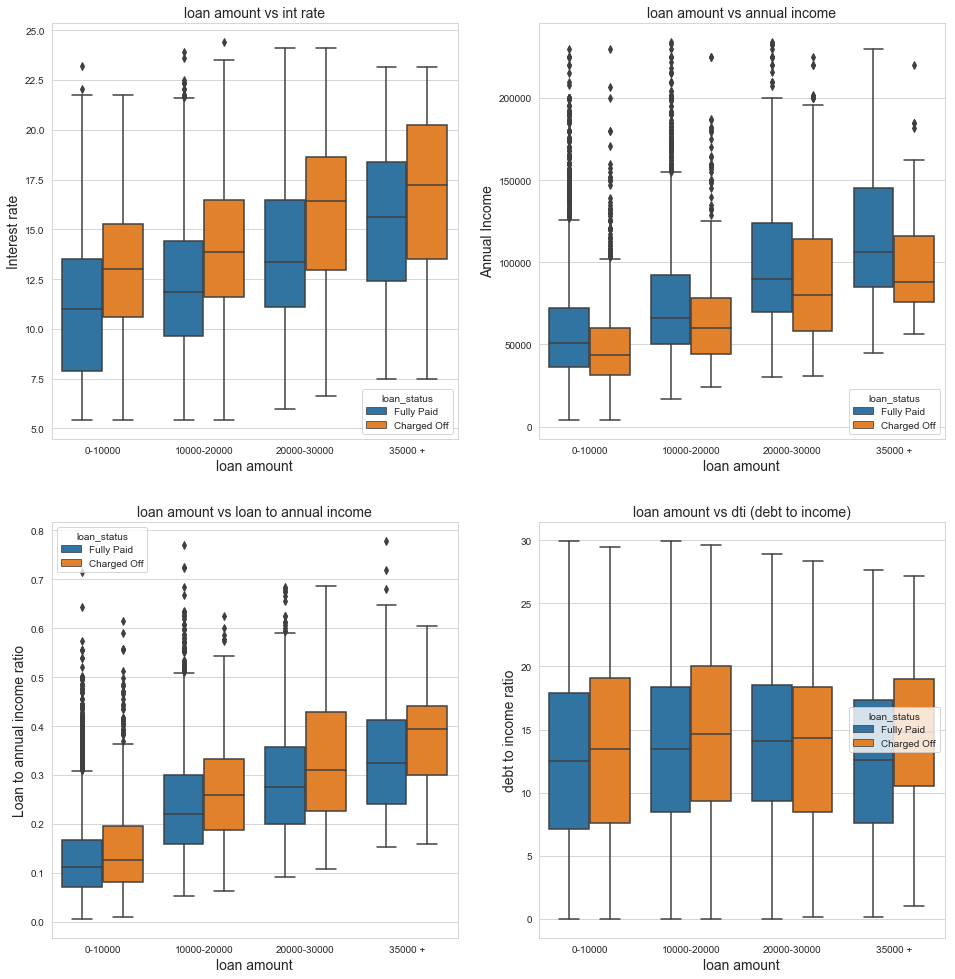

In [69]:
#plotting the box plots for loan_amount with int rate, annual income, dti, l_t_ai
plt.figure(figsize=(16,26))
# subplot 1 - loan amount vs int rate
plt.subplot(3, 2, 1)
sns.boxplot(data=top_states,x='loan_amnt_cat',y='int_rate',hue='loan_status')
plt.title("loan amount vs int rate",fontsize=14)
plt.xlabel("loan amount",fontsize=14)
plt.ylabel("Interest rate",fontsize=14)
#subplot 2 - loan amount vs annual income
plt.subplot(3, 2, 2)
sns.boxplot(data=top_states,x='loan_amnt_cat',y='annual_inc',hue='loan_status')
plt.title("loan amount vs annual income",fontsize=14)
plt.xlabel("loan amount",fontsize=14)
plt.ylabel("Annual Income",fontsize=14)
#subplot 2 - loan amount vs loan to annual income
plt.subplot(3, 2, 3)
sns.boxplot(data=top_states,x='loan_amnt_cat',y='l_t_ai',hue='loan_status')
plt.title("loan amount vs loan to annual income",fontsize=14)
plt.xlabel("loan amount",fontsize=14)
plt.ylabel("Loan to annual income ratio",fontsize=14)
#subplot 2 - loan amount vs dti (debt to income)
plt.subplot(3, 2, 4)
sns.boxplot(data=top_states,x='loan_amnt_cat',y='dti',hue='loan_status')
plt.title("loan amount vs dti (debt to income)",fontsize=14)
plt.xlabel("loan amount",fontsize=14)
plt.ylabel("debt to income ratio",fontsize=14)
plt.show()

### Insights
- #### SUBPLOT 1 : It is clearly evident that for the same loan amount, Charged-off loans have significantly more interest rates, probably because they were graded less by the approver and hence higher rate of interest.
- #### SUBPLOT 2 : Here the annual income of the charged off loans is lower whereas the fully paid ones have higher income ranges.

- #### SUBPLOT 3 : Loan to annual income ratio l_t_ai ratio has been clearly higher for charged off loans as compared to their peers in the same loan amount category.
- #### SUBPLOT 4 : DTI is almost similar to both the charged off and fully paid, that's the primary reason behind creation of a loan to annual income ratio variable

` From subplot 1 and subplot 2 we understood that, applicants with low income ranges are charged higher interest rates  and thus they defaulted.`

## Aggregating variables to see the differences between 'fully paid' and 'charged off'
Aggregating categorical variables and loan status to clearly see what values of parameters act as reason for default

In [70]:
#Aggregating with median the loan amount categorical variable 
top_states.loc[:,['int_rate','installment','annual_inc','dti','l_t_ai','addr_state','loan_status','loan_amnt_cat']].groupby(by=['loan_amnt_cat','loan_status']).median()

int_rate  installment  annual_inc     dti    l_t_ai
loan_amnt_cat loan_status                                                     
0-10000       Charged Off    12.990      176.650     43800.0  13.460  0.126852
              Fully Paid     10.990      186.500     51000.0  12.485  0.112500
10000-20000   Charged Off    13.850      406.415     60000.0  14.605  0.259259
              Fully Paid     11.860      421.680     66000.0  13.470  0.219991
20000-30000   Charged Off    16.400      643.580     80000.0  14.360  0.310651
              Fully Paid     13.350      712.250     90000.0  14.100  0.275000
35000 +       Charged Off    17.205      858.590     88000.0  14.810  0.393308
              Fully Paid     15.620      872.480    106000.0  12.610  0.324074

### For charged-off loans when compared with fully paid loans
- ### Interest rate,dti & l_t_ai are higher
- ### Annual income, Installment are lower 

In [71]:
#Aggregating with median the annual income categorical variable 
top_states.loc[:,['loan_amnt','int_rate','installment','annual_inc','dti','l_t_ai',"annual_inc_cat","loan_status"]].groupby(by=["annual_inc_cat","loan_status"]).median()

loan_amnt  int_rate  installment  annual_inc  \
annual_inc_cat loan_status                                                 
very low       Charged Off       4500    12.870       136.33     20800.0   
               Fully Paid        4400    11.140       137.99     21000.0   
low            Charged Off       8000    13.060       238.96     39996.0   
               Fully Paid        7500    11.490       225.58     40000.0   
medium         Charged Off      12000    13.990       339.06     62400.0   
               Fully Paid       10000    11.480       304.36     64000.0   
high           Charged Off      15000    14.110       456.12     90000.0   
               Fully Paid       12000    11.580       348.29     90000.0   
very high      Charged Off      20000    14.615       495.93    125000.0   
               Fully Paid       15000    11.860       417.34    125000.0   

                               dti    l_t_ai  
annual_inc_cat loan_status                    
very low       Charged Off  11.920  0.253456  
               Fully Paid   11.725  0.225000  
low            Charged Off  14.580  0.211111  
               Fully Paid   14.160  0.193182  
medium         Charged Off  14.880  0.192308  
               Fully Paid   13.400  0.153846  
high           Charged Off  11.880  0.168675  
               Fully Paid   12.550  0.130435  
very high      Charged Off  12.980  0.135710  
               Fully Paid   10.600  0.109234

### For charged-off loans when compared with fully paid loans
- ### Loan amount, Interest rate, Installment,dti & l_t_ai are higher
- ### Annual income is lower 

In [72]:
#Aggregating with median the loan to annual income categorical variable 
top_states.loc[:,['int_rate','annual_inc','dti','l_t_ai',"annual_inc_cat","loan_status","l_t_ai_cat"]].groupby(by=["l_t_ai_cat","loan_status"]).median()

int_rate  annual_inc     dti    l_t_ai
l_t_ai_cat loan_status                                        
0-0.1      Charged Off    12.730     62000.0  12.930  0.070000
           Fully Paid     10.805     72700.0  11.405  0.068355
0.1-0.2    Charged Off    13.430     56000.0  13.560  0.150000
           Fully Paid     11.460     61200.0  12.560  0.147222
0.2-0.3    Charged Off    14.220     54000.0  14.370  0.250000
           Fully Paid     12.420     53000.0  13.940  0.241523
0.3-0.4    Charged Off    14.650     48000.0  15.110  0.338983
           Fully Paid     12.260     48000.0  15.380  0.340940
0.4+       Charged Off    14.655     42500.0  15.670  0.447751
           Fully Paid     12.420     40000.0  14.740  0.441667

### For charged-off loans when compared with fully paid loans
- ### Interest rate,dti & l_t_ai are higher
- ### Annual income is lower 

# Observations & Recommendations 

#### The following are the key driving factors that are leading to defaults eventually charged Off loans

- ### Exercise caution over loans given to very low and low income groups.
- ### Reduction of Exposure to poorer graded loans (Grades D,E,F,G).
- ### Compare the relative LTAI ratio values from the tables provided above to identify a probable default loan application.
- ### Instead of providing a loan with a term of 60 months with lower instalments, providing a lesser loan amount with a term of 36 months that matches their LTAI and instalment capacity may reduce default.
- ### It is better to provide a higher loan amount to high annual income applicant having a lower LTAI at lower interest rate than providing a lower loan amount to low income applicant having a higher LTAI at a high interest rate.